In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse

In [10]:
pd.options.display.max_columns = None
plt.rcParams['figure.figsize'] = 10, 8

In [5]:
df_hits = pd.read_csv ("../Data/top_100_Billboard_20_years.csv")

In [6]:
df_hits.head()

,artist,title,id,date_chart,release_date,rank,weeks,isNew,peakPos,lastPos,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_artist,popularity_song,genres,label,song_lyrics
0,Santana,Smooth,0n2SEXB2qoRQg171q7XqeW,2000-01-01,1999-06-15,1,23,False,1,1,0.609,0.923,9,-3.908,1,0.0338,0.1600,0.000005,0.2950,0.9610,115.996,4,74,70,"['blues rock', 'classic rock', 'mexican classi...",Columbia/Legacy,"Man, it's a hot one\nLike seven inches from th..."
1,Brian McKnight,Back At One,6mwA6YiKDjAUG8kWvRRUPh,2000-01-01,1999-09-21,2,19,False,2,2,0.661,0.346,11,-9.115,1,0.0300,0.4520,0.000000,0.1310,0.2560,129.752,4,65,70,"['dance pop', 'neo soul', 'new jack swing', 'q...",Motown,It's undeniable\nThat we should be together\nI...
2,Jessica Simpson,I Wanna Love You Forever,5gZEhPrN1VLqTG1nIAXeNK,2000-01-01,1999-11-16,3,12,False,3,3,0.590,0.666,4,-4.047,0,0.0244,0.1560,0.000000,0.1360,0.0743,104.042,4,55,58,"['dance pop', 'post-teen pop', 'urban contempo...",Columbia,You set my soul at ease\nChased darkness out o...
3,Whitney Houston,My Love Is Your Love,1ckU1EhAO0Nr73QYw24SWJ,2000-01-01,1998-11-17,4,18,False,4,5,0.770,0.475,7,-9.512,1,0.1590,0.0557,0.000005,0.0607,0.4740,82.511,4,81,68,"['dance pop', 'pop', 'urban contemporary']",Arista,"Clap your hands, y'all\nIt's alright (Turn me ..."
4,Savage Garden,I Knew I Loved You,6nozDLxeL0TE4MS9GqYU1v,2000-01-01,1999-11-09,5,11,False,4,4,0.610,0.497,9,-9.880,1,0.0279,0.3200,0.000061,0.0884,0.7390,85.031,4,68,69,"['boy band', 'dance pop', 'europop', 'pop rock']",Columbia,Maybe it's intuition\nBut some things you just...


in the last 20 years we calculate the total number of songs that have appeared on billboard's hot-100

In [7]:
df_hits["id"].nunique()

8216

## boxplot per year
    - we plot boxplot of each characteristic per year to see evolution over time

In [8]:
df_hits.insert(loc=3,column="year", value= df_hits["date_chart"].map (lambda date: parse(date, fuzzy=True).year))

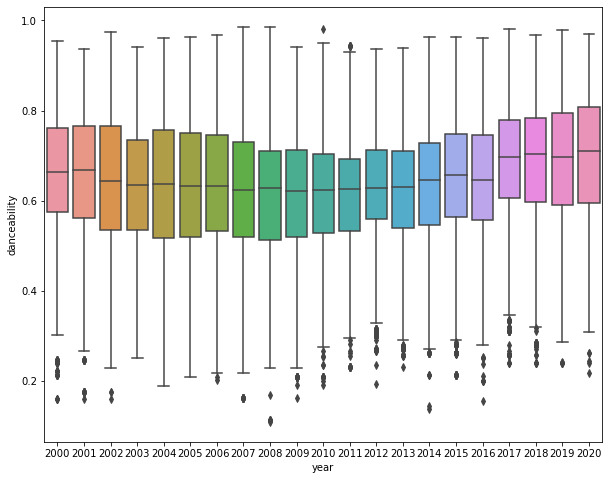

In [11]:
sns.boxplot(x="year",y="danceability",data = df_hits);

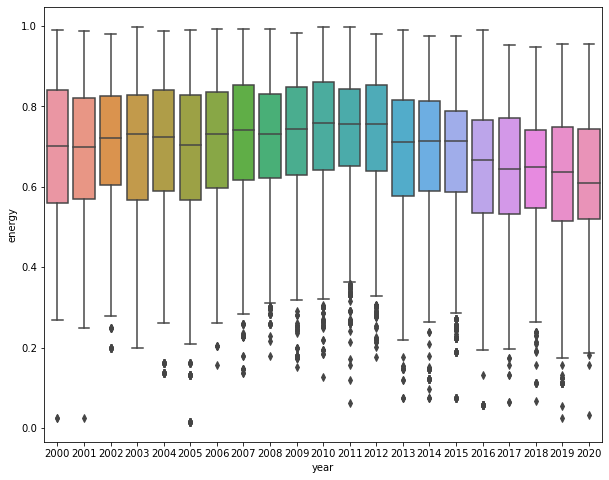

In [12]:
sns.boxplot(x="year",y="energy",data = df_hits);

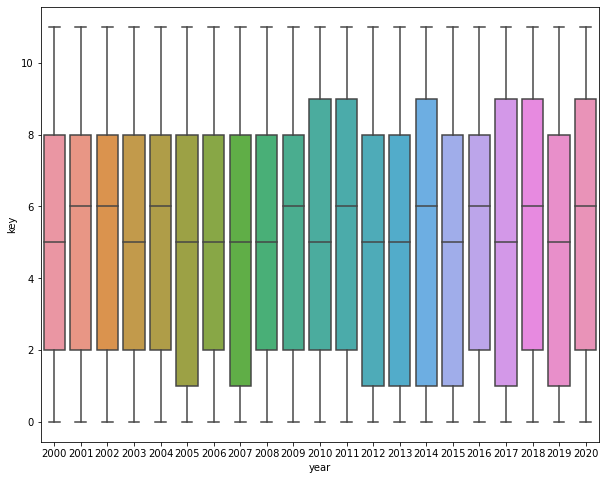

In [13]:
sns.boxplot(x="year",y="key",data = df_hits);

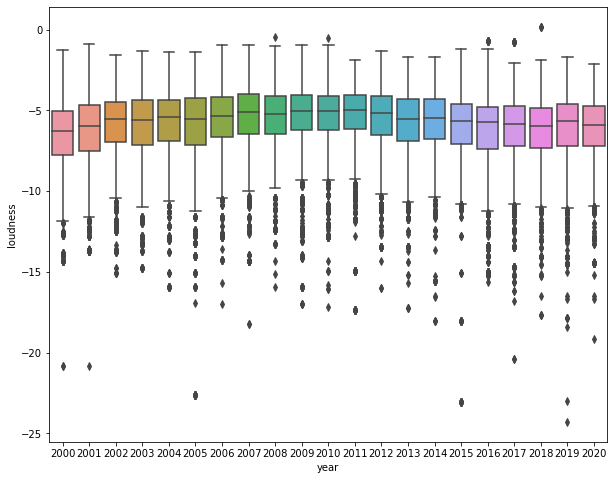

In [16]:
sns.boxplot(x="year",y="loudness",data = df_hits);

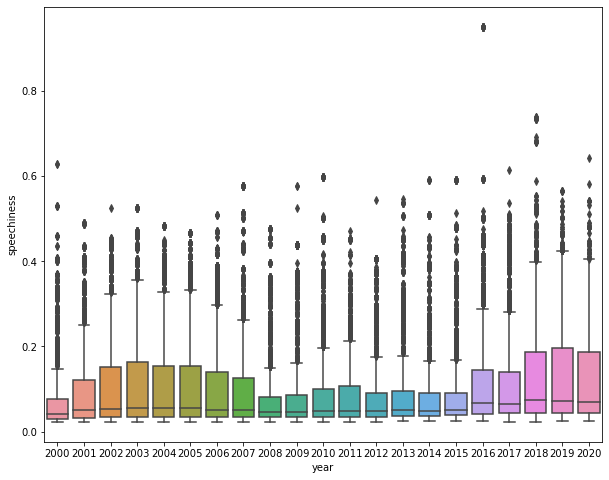

In [17]:
sns.boxplot(x="year",y="speechiness",data = df_hits);

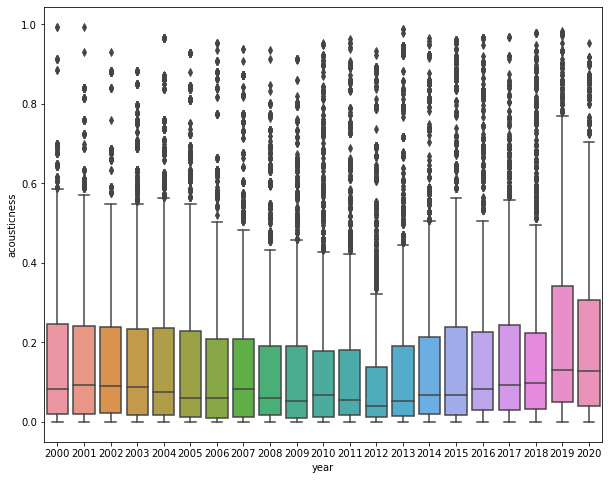

In [18]:
sns.boxplot(x="year",y="acousticness",data = df_hits);

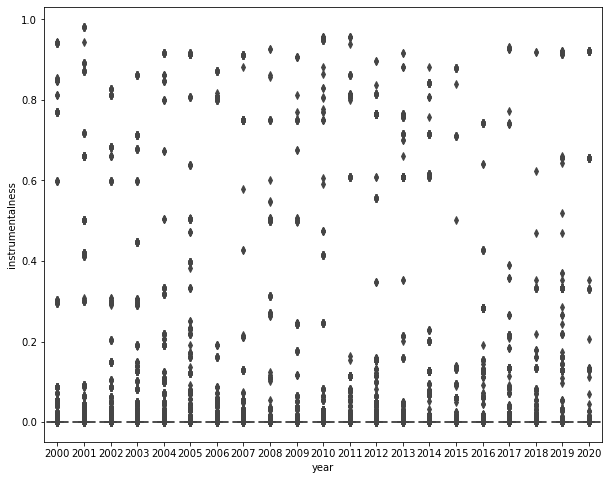

In [19]:
sns.boxplot(x="year",y="instrumentalness",data = df_hits);

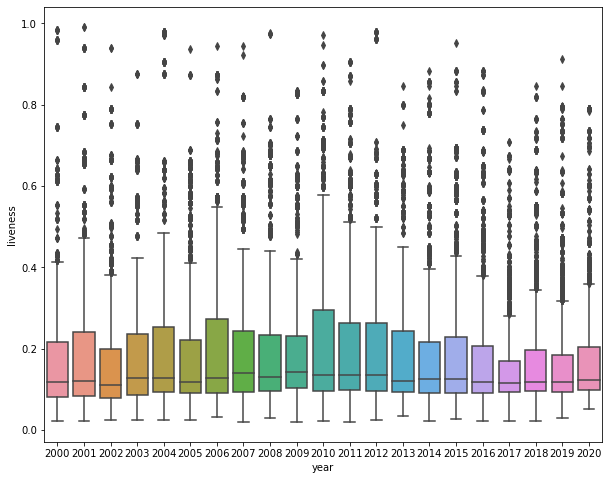

In [20]:
sns.boxplot(x="year",y="liveness",data = df_hits);

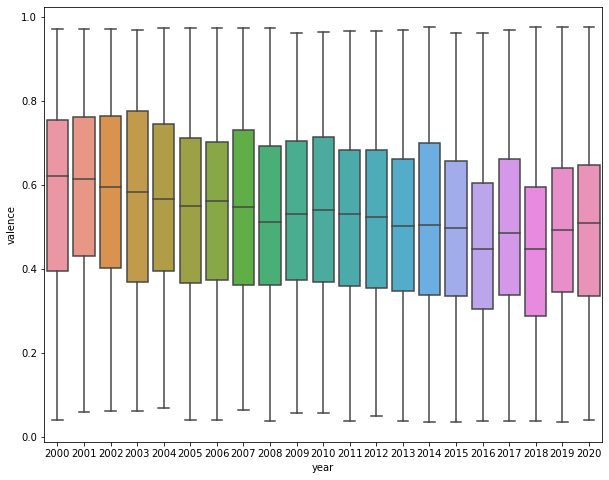

In [21]:
sns.boxplot(x="year",y="valence",data = df_hits);

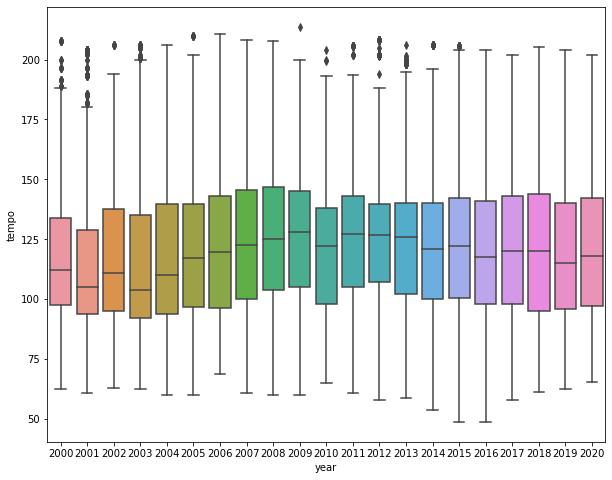

In [22]:
sns.boxplot(x="year",y="tempo",data = df_hits);

## Top 10 artists with the most hits songs

In [24]:
df_hits_uniq = df_hits.sort_values("weeks", ascending=False).drop_duplicates(subset = ["id"])

In [25]:
df_hits_uniq.groupby("artist").count().sort_values('title',ascending=False).iloc[:10]["title"]

artist
Glee Cast        179
Drake             97
Taylor Swift      85
Eminem            44
Drake             43
The Weeknd        42
Future            42
Kenny Chesney     41
Justin Bieber     41
Keith Urban       37
Name: title, dtype: int64

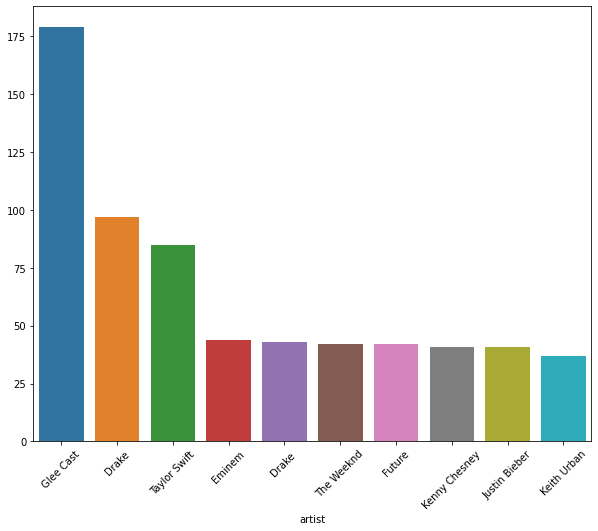

In [81]:
hits_bar_data = df_hits_uniq.groupby("artist").count().sort_values('title',ascending=False).iloc[:10]["title"]
chart = sns.barplot(hits_bar_data.index, hits_bar_data.values);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

## Songs more weeks on hit list

In [37]:
df_hits_uniq.sort_values('weeks',ascending=False).iloc[:10][["artist","title","weeks","release_date"]]

,artist,title,weeks,release_date
74401,Imagine Dragons,Radioactive,87,2012-09-04
73704,AWOLNATION,Sail,79,2011
50562,Jason Mraz,I'm Yours,76,2008-05-12
76686,OneRepublic,Counting Stars,68,2014-01-01
65035,LMFAO,Party Rock Anthem,68,2011-01-01
63636,Adele,Rolling In The Deep,65,2011-01-19
40974,Carrie Underwood,Before He Cheats,64,2005-11-14
32684,Lifehouse,You And Me,62,2005-03-22
70716,The Lumineers,Ho Hey,62,2012-04-03
75191,Imagine Dragons,Demons,61,2012-09-04


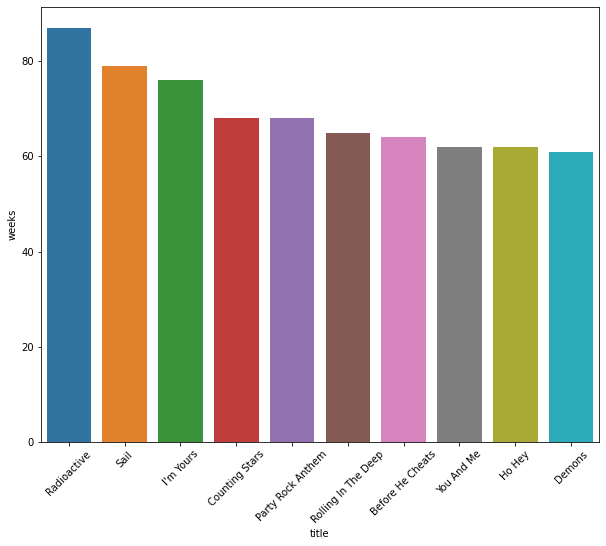

In [87]:
chart = sns.barplot(x="title",y="weeks",data = df_hits_uniq.sort_values('weeks',ascending=False).iloc[:10]);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

## Songs with the longest number 1

In [43]:
df_hits_1 = df_hits.drop(df_hits[df_hits["rank"]>1].index)

In [67]:
df_hits_1.groupby(["id","artist","title"]).count().sort_values("weeks",ascending = False).iloc[:15]["weeks"]

id                      artist                      title                   
2YpeDb67231RjR0MgVLzsG  Lil Nas X                   Old Town Road               19
6rPO02ozF3bM7NnOV4h6s2  Luis Fonsi & Daddy Yankee   Despacito                   16
32OlwWuMpZ6b0aN2RZOeMS  Mark Ronson                 Uptown Funk!                14
5qsbHA7Z5a2vp5wtBIzioT  The Black Eyed Peas         I Gotta Feeling             14
3LmvfNUQtglbTrydsdIqFU  Mariah Carey                We Belong Together          14
2JzZzZUQj3Qff7wapcbKjc  Wiz Khalifa                 See You Again               12
5rb9QrpfcKFHM1EUbSIurX  Usher                       Yeah!                       12
5Z01UMMf7V1o0MzF86s6WJ  Eminem                      Lose Yourself               12
7BKLCZ1jbUBVqRi2FVlTVw  The Chainsmokers            Closer                      12
7qiZfU4dY1lWllzX7mPBI3  Ed Sheeran                  Shape Of You                12
0n4bITAu0Y0nigrz3MFJMb  Robin Thicke                Blurred Lines               12
7xRNsqOQOg

## Record labels with the most hits

In [144]:
df_hits_uniq.groupby("label").count().sort_values('id',ascending=False).iloc[:10]["id"]

label
Columbia              450
RCA Records Label     222
Atlantic Records      194
Warner Records        193
Jive                  158
Epic                  154
Def Jam Recordings    138
Interscope            121
Capitol Nashville     117
Republic Records      111
Name: id, dtype: int64

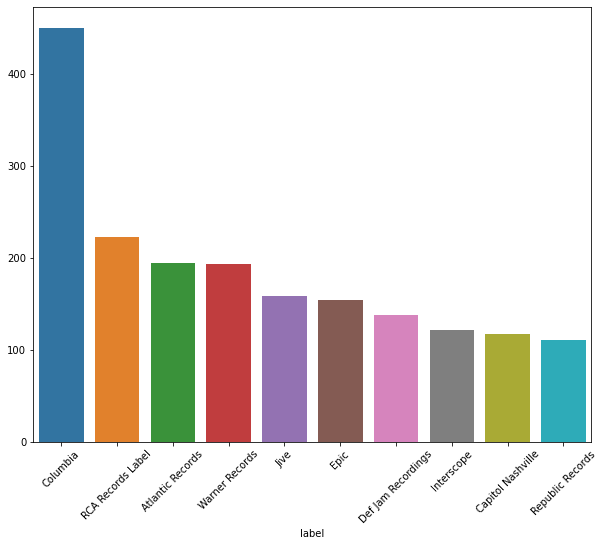

In [83]:
hits_bar_data = df_hits_uniq.groupby("label").count().sort_values('id',ascending=False).iloc[:10]["id"]
chart = sns.barplot(hits_bar_data.index, hits_bar_data.values);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);